In [ ]:
# Elizabeth Shelton; adapted from code by Sile Shu
# Used to automatically weight concepts in a spreadsheet of protocols by concept frequency
# Rarer concepts are weighted higher because they are more conclusive to determining the correct protocol

In [55]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from scipy import spatial
from collections import defaultdict
import csv
from nltk import FreqDist, MLEProbDist
import matplotlib
import matplotlib.pyplot as plt
''' # if openpyxl isn't found, uncomment this block the first time you run this cell in a session 
import sys
!{sys.executable} -m pip install openpyxl
'''
import openpyxl

ModuleNotFoundError: No module named 'openpyxl'

In [10]:
protocols = 'ODEMSA_Protocols_Expanded.xlsx'
all_concepts = dict()
pro_df = pd.read_excel(protocols)
for line in pro_df.iterrows():
    if not pd.isnull(line[1]['Signs&Symptoms']):
        line_ss = line[1]['Signs&Symptoms'].split(';')
        for concept in line_ss:
            if concept in all_concepts:
                all_concepts[concept] += 1
            else:
                all_concepts[concept] = 1
    if not pd.isnull(line[1]['Possible signs&symptoms additions']):
        line_ssr = line[1]['Possible signs&symptoms additions'].split(';')
        for concept in line_ssr:
            if concept in all_concepts:
                all_concepts[concept] += 1
            else:
                all_concepts[concept] = 1
                

In [28]:
# I used some of this information to manually determine cutoff points. It could be done using the results from statistical analysis instead
# freq_dist = FreqDist(all_concepts)
# prob_dist = MLEProbDist(freq_dist)
counts = list(all_concepts.values())
counts.sort()

# # freq_dist.plot()

(array([82., 23., 11.,  5.,  4.,  1.,  4.,  3.,  4.,  1.,  2.,  3.,  0.,
         1.,  1.,  1.,  1.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18.]),
 <a list of 17 Patch objects>)

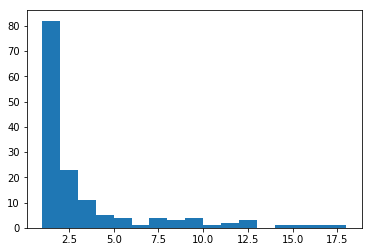

In [24]:
#plt.hist(counts, bins=17)

In [32]:
# To see what we're working with
# print(counts)
# print(sum(counts)/len(counts))
# print(counts[73])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 10, 11, 11, 12, 12, 12, 14, 15, 16, 18]
2.8979591836734695
1


In [37]:
# weights = {1:5, 3:4, 8:3, 12:2, 18:1 # I determined these by hand and just hard-coded them. Can be altered as needed.
weighted = dict()
for concept in all_concepts:
    if all_concepts[concept] > 12:
        weighted[concept] = 1
    elif all_concepts[concept] > 8:
        weighted[concept] = 2
    elif all_concepts[concept] > 3:
        weighted[concept] = 3
    elif all_concepts[concept] > 1:
        all_concepts[concept] = 4
    else:
        all_concepts[concept] = 5


In [50]:
final = []
for line in pro_df.iterrows():
    if not pd.isnull(line[1]['Signs&Symptoms']):
        line_ss = line[1]['Signs&Symptoms'].split(';')
        for i in range(len(line_ss)):
            line_ss[i] = line_ss[i] + str(weighted[line_ss[i]])
        line_ss = ";".join(line_ss)
    if not pd.isnull(line[1]['Possible signs&symptoms additions']):
        line_ssr = line[1]['Possible signs&symptoms additions'].split(';')
        for j in range(len(line_ssr)):
            line_ssr[j] = line_ssr[j] + str(weighted[line_ssr[j]])
        line_ssr = ";".join(line_ssr)
    name = line[1]['Protocol']
    final.append([name, line_ss, "", line_ssr])

In [61]:
# If the spreadsheet already exists, you might have a permission error. Try naming it something different.
df = pd.DataFrame(final, columns=['Protocol', 'Signs&Symptoms', 'Interventions', 'Possible signs&symptoms additions'])
# print(df)
df.to_excel("ODEMSA_Protocols_Expanded_weighted.xlsx")

PermissionError: [Errno 13] Permission denied: 'ODEMSA_Protocols_Expanded_weighted.xlsx'